## Modelo de Segmentacion de Clientes Basado en Datos (RFM) COINK

<p style="text-align: justify;"> "Una de las labores del equipo de Data en esta empresa es la de definir métricas para evaluar el desempeño de la compañía. Este punto no tiene una respuesta única y se evaluará su creatividad. Para ello usará una base de depósitos en Oinks (depositos_oink.csv). Los Oinks son máquinas en los que la gente puede depositar sus ahorros. Con ella debe construir una métrica que evalúe qué tan buenos (bajo su propio criterio) son los usuarios de Coink y calificar a los usuarios contenidos en la muestra. Cualquier gráfica para aclarar su métrica es bienvenida (use la herramienta de visualización que mejor crea conveniente)".</p>

<p style="text-align: justify;">el problema plantedo dispone la necesidad de segmentar a clientes basado con que frencuencia  realizan depositos Oinks, cuanto gastan en Total  y con que frencuencia realizan depositos. Con el fin de dar una calificacion  que represente su disposicion a usar la app Oinks</p>


<p style="text-align: justify;"> La estrategia de trabajo se plantea en :

1. Exploarar el conjunto de datos
2. Entender el conjunto de los datos 
3. Manipular el Conjunto de datos para obtener metricas utiles
4. Ofrecer Respuestas a los Stakeholders


In [57]:
import pandas as pd 
import datetime as dt
import numpy as np

df = pd.read_csv("/Users/juanfelipearango/Documents/PRUEBA DE CARGO - Científico de datos   /depositos_oinks.csv")
df.head()

,Unnamed: 0,user_id,operation_value,operation_date,maplocation_name,user_createddate
0,0,0e52d550-ae23-407a-9b1f-6e5fb1f066ab,273850.0,2022-01-14 13:07:56,CC Plaza de las Américas - Plaza Mariposa,2022-01-09 19:23:18.332689
1,1,975ed41e-d891-4c23-aeba-06363019d8e3,900.0,2022-02-06 13:11:25,CC Plaza de las Américas - Plaza Mariposa,2022-01-10 15:19:29.419075
2,2,f9043545-dfc2-402f-a8c7-0a61f21cb719,1800.0,2022-02-23 14:01:56,Universidad de los Andes - ML Piso 5,2021-08-25 12:44:48.524941
3,3,979ca8ad-9600-4a1f-81e9-e70c2f55cdc5,6500.0,2021-12-16 12:09:45,CC Plaza de las Américas - Plaza Mariposa,2021-07-17 17:11:16.766291
4,4,171db06e-2e4b-4542-a9c9-32028520fda4,150000.0,2022-01-25 12:00:18,CC Plaza de las Américas - Plaza Mariposa,2022-01-11 15:59:27.651994


## Analisis Exploratorio de los Datos
Se procede a realizar analisis exploratorio de los datos , primero se realizo una aproximacion desde la prespectiva de graficas que pudiera sugerir relaciones empiricas esta grafica se encuentra disponible en [Tableu Public](https://public.tableau.com/app/profile/juan.felipe116/viz/CoinkDataUsers2021-2022/Dashboard1?publish=yes)

----
Luego se procede a usar la funcion "describe" para entender el comportamiento estadistico de cada variable numerica, se descarta el analisis de la columna 1 puesto que es el ID 

In [58]:
df.describe()

,Unnamed: 0,operation_value
count,4345.000000,4.345000e+03
mean,2172.000000,3.461835e+04
std,1254.437789,1.071427e+05
min,0.000000,5.000000e+01
25%,1086.000000,1.650000e+03
50%,2172.000000,5.600000e+03
75%,3258.000000,2.230000e+04
max,4344.000000,2.595000e+06


Explorando los atributos hay una relacion de 6 columnas la descripcion de las variables son :
* Column1:ID unica clave
* User_id:id del usuario
* Operation_value:valor monterio del deposito
* Operation_data:fecha de realizacion de la operacion
* Maplocation_name: ubicacion geografica del deposito
* User_createddate:fecha de creacion el usuario

### Limpieza de los datos
Se procede a buscar datos faltanes en el set para evaluar la integralidad de los datos;
No se encuentra datos faltantes 

In [59]:
df.isnull().sum()

Unnamed: 0          0
user_id             0
operation_value     0
operation_date      0
maplocation_name    0
user_createddate    0
dtype: int64

## Analisis del problema de Negocio
El problema plantea que evalue que tan bueno son los usuario  por ello se debe definir que es un " usuario bueno " para coink en general se puede interpretar que este es aquel que  realiza depositos frecuentes y  que el total de monto depostido sea presentativo, el problema puede ser abordado luego de revisar la literatura con un alsis de RFM es cual es una tecncia de segmentacion del comportamiento del cliente  basado en datos .

RFM significa Recencia, Frencuencia y Valor Monetario, la idea es segmenetar a los clientes segun estas caracteristicas las cuales han sido desmotradas de predecir la disposicion de un cliente de participar en una campaña o negocio.

La metrica se basa en definir numericamente 

* Recencia: ¿cuándo fue la última vez que el usuario realizó depositos Oinks?
* Frecuencia: ¿cuántas veces realiza el usuario depositos Oinks?
* Valor monetario: ¿cuál es la suma del valor monetario de este usuario a lo largo de su vida con Oink?

Adicionalmente se generan otras preguntas como
* ¿Desde que Ubicaciones realizan los depositos?
* ¿Cuando Depositan?
* ¿Existe realcion entre la ubicacion y el monto depositado?
* ¿Con que frencuencia depositan?
* ¿La Frencuencia y los montos como estan relacionados?


## Analisis Univariado 

### Desde Donde Hacen las Operaciones?

CC Plaza de las Américas  - Plaza Mariposa    1976
CC Los Molinos - Zona Montaña Nivel 2         1894
Universidad de los Andes - ML Piso 5           475
Name: maplocation_name, dtype: int64

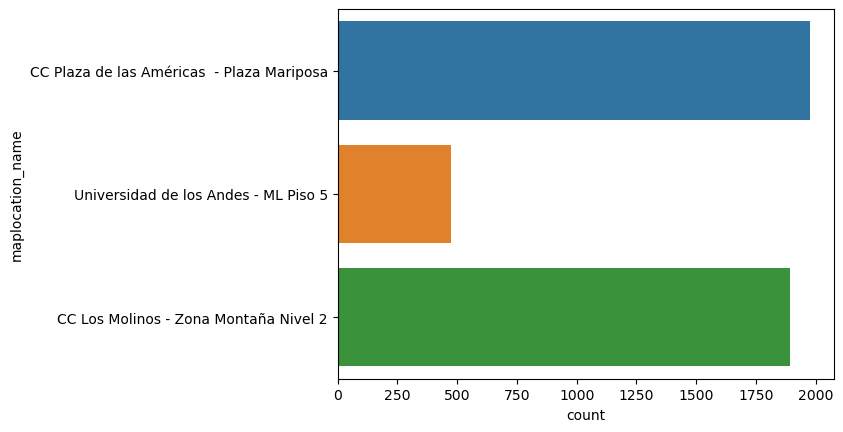

In [60]:
import seaborn as sns
sns.countplot(data=df,y="maplocation_name")
pd.value_counts(df["maplocation_name"])


In [61]:
100 * df["maplocation_name"].value_counts()/len(df["maplocation_name"])

CC Plaza de las Américas  - Plaza Mariposa    45.477560
CC Los Molinos - Zona Montaña Nivel 2         43.590334
Universidad de los Andes - ML Piso 5          10.932106
Name: maplocation_name, dtype: float64

La tabla de frencuencias relativas muestra los porcentajes, en el recuento de la localizacion  se observa que el 45.47% de los depostidos de los usuarios son realizados en el CC de las americas - Plaza Mariposa , le sigue con un 43.59% lo usuarios de la localizacion  en el CC los Molinos  ZONA montaña nivel 2 y en menor aporte de medida los pertenencientes la categoria de la Universidad de los Andes Piso 5

Luego surge la pregunta, existe alguna relacion entre el valor de la operacion( cuanto depositan por operaicon) y la localizacion , se utiliza la siguiente tabla de contingencia para agrupar los recuentos de valores de operacion y ubicacion , la tabla muestra las primeras y ultimas columnas

In [62]:
pd.crosstab(index=df["maplocation_name"],         
               columns=df["operation_value"], margins=True)


operation_value,50.0,100.0,150.0,200.0,250.0,300.0,350.0,400.0,450.0,500.0,...,1077700.0,1151950.0,1212100.0,1361900.0,1389950.0,1500000.0,1550350.0,2156650.0,2595000.0,All
maplocation_name,,,,,,,,,,,,,,,,,,,,,
CC Los Molinos - Zona Montaña Nivel 2,124,45,3,50,3,21,5,15,2,33,...,0,0,0,0,0,0,0,0,0,1894
CC Plaza de las Américas - Plaza Mariposa,10,39,2,26,7,12,2,11,4,36,...,1,1,1,1,1,1,1,1,1,1976
Universidad de los Andes - ML Piso 5,1,5,1,4,1,6,3,11,0,10,...,0,0,0,0,0,0,0,0,0,475
All,135,89,6,80,11,39,10,37,6,79,...,1,1,1,1,1,1,1,1,1,4345


### Cuanto Depositan mis clientes ?

In [63]:
gh=df.operation_value.value_counts()
print(gh)

50.0        135
2000.0      130
1000.0      106
100.0        89
200.0        80
           ... 
82700.0       1
16050.0       1
34900.0       1
41450.0       1
126200.0      1
Name: operation_value, Length: 1232, dtype: int64


In [64]:
100*df.operation_value.value_counts()/len(df.operation_value)

50.0        3.107020
2000.0      2.991945
1000.0      2.439586
100.0       2.048331
200.0       1.841197
              ...   
82700.0     0.023015
16050.0     0.023015
34900.0     0.023015
41450.0     0.023015
126200.0    0.023015
Name: operation_value, Length: 1232, dtype: float64

En la Tabla se puede ver que 
* los montos de operacion mas altos se realizan en el CC PLANZA DE LAS AMERRICAS y UNIVERSIDAD DE LOS ANTES
* los montos de menor valor y mayor frencuencia se realizan el e CC los Molinos Montaña Nivel 2
* los resultados son cotrastante puesto que si bien en la Universidad de los andes se realizan menos operaciones(freq), estas son de mayor valor depostiado, por el contrario 

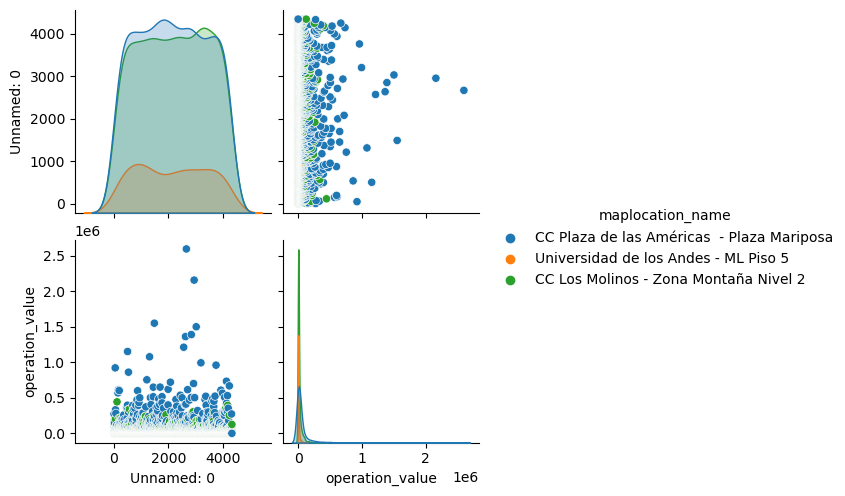

In [65]:
sns.pairplot(df,hue="maplocation_name")

# RFM Analisis

Calculando la Recencia

In [66]:
df["operation_date"]=pd.to_datetime(df["operation_date"])
df_recency=df.groupby(by="user_id",as_index=False)["operation_date"].max()
df_recency.columns= ["user_id","laspurchasedate"]
recent_date = df_recency["laspurchasedate"].max()
df_recency["recency"]=df_recency["laspurchasedate"].apply(
   lambda x: (recent_date - x).days)
df_recency.head()


,user_id,laspurchasedate,recency
0,001762e3-094d-415c-9304-c7c182e0c16a,2022-02-21 13:13:53,3
1,002a5f4d-a93d-4cc5-b089-e16169bc16a2,2022-01-26 09:19:35,29
2,006687d3-8ff3-461e-bdac-cb8e8e4c5a26,2021-12-15 20:05:14,70
3,0072157e-a634-4cb3-bead-b1a2981485ca,2022-02-05 11:26:26,19
4,0082af19-8bf7-46f7-8a21-c34e46ac5e2a,2022-02-12 18:53:47,11


Calculando la Frecuencia

In [67]:
frequency_df = df.drop_duplicates().groupby(
    by=["user_id"], as_index=False)['operation_date'].count()
frequency_df.columns = ['user_id', 'Frequency']
frequency_df.head()

,user_id,Frequency
0,001762e3-094d-415c-9304-c7c182e0c16a,3
1,002a5f4d-a93d-4cc5-b089-e16169bc16a2,1
2,006687d3-8ff3-461e-bdac-cb8e8e4c5a26,4
3,0072157e-a634-4cb3-bead-b1a2981485ca,10
4,0082af19-8bf7-46f7-8a21-c34e46ac5e2a,1


Calculando el valor Monetario

In [68]:
monetary_df= df.groupby (by="user_id", as_index=False) ["operation_value"].sum()
monetary_df.columns=["user_id","Monetary"]
monetary_df.head()

,user_id,Monetary
0,001762e3-094d-415c-9304-c7c182e0c16a,44750.0
1,002a5f4d-a93d-4cc5-b089-e16169bc16a2,259000.0
2,006687d3-8ff3-461e-bdac-cb8e8e4c5a26,375600.0
3,0072157e-a634-4cb3-bead-b1a2981485ca,433450.0
4,0082af19-8bf7-46f7-8a21-c34e46ac5e2a,1500.0


Uniendo las  3 columnas con los valores calculados

In [69]:
rf_df = df_recency.merge(frequency_df, on='user_id')
rfm_df = rf_df.merge(monetary_df, on='user_id').drop(
    columns='laspurchasedate')
rfm_df.head()

,user_id,recency,Frequency,Monetary
0,001762e3-094d-415c-9304-c7c182e0c16a,3,3,44750.0
1,002a5f4d-a93d-4cc5-b089-e16169bc16a2,29,1,259000.0
2,006687d3-8ff3-461e-bdac-cb8e8e4c5a26,70,4,375600.0
3,0072157e-a634-4cb3-bead-b1a2981485ca,19,10,433450.0
4,0082af19-8bf7-46f7-8a21-c34e46ac5e2a,11,1,1500.0


Rankeando Clientes 

In [70]:
rfm_df['R_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)

In [71]:
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100
 
rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
rfm_df.head()

,user_id,recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,001762e3-094d-415c-9304-c7c182e0c16a,3,3,44750.0,92.343032,77.989130,77.989130
1,002a5f4d-a93d-4cc5-b089-e16169bc16a2,29,1,259000.0,49.464012,26.056763,26.056763
2,006687d3-8ff3-461e-bdac-cb8e8e4c5a26,70,4,375600.0,14.211332,85.326087,85.326087
3,0072157e-a634-4cb3-bead-b1a2981485ca,19,10,433450.0,63.338438,96.497585,96.497585
4,0082af19-8bf7-46f7-8a21-c34e46ac5e2a,11,1,1500.0,77.886677,26.056763,26.056763


#RFM SCORE calculo

In [72]:
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 * \
    rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['user_id', 'RFM_Score']].head(7)

,user_id,RFM_Score
0,001762e3-094d-415c-9304-c7c182e0c16a,4.01
1,002a5f4d-a93d-4cc5-b089-e16169bc16a2,1.48
2,006687d3-8ff3-461e-bdac-cb8e8e4c5a26,3.73
3,0072157e-a634-4cb3-bead-b1a2981485ca,4.58
4,0082af19-8bf7-46f7-8a21-c34e46ac5e2a,1.69
5,00c042ce-0555-43ca-b38f-81c0a43cef9e,1.18
6,00e20270-69ed-4bae-9c3e-40a24befc0e1,3.17


In [73]:
rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] >
                                      4.5, "Top Customers",
                                      (np.where(
                                        rfm_df['RFM_Score'] > 4,
                                        "High value Customer",
                                        (np.where(
    rfm_df['RFM_Score'] > 3,
                             "Medium Value Customer",
                             np.where(rfm_df['RFM_Score'] > 1.6,
                            'Low Value Customers', 'Lost Customers'))))))
rfm_df[['user_id', 'RFM_Score', 'Customer_segment']].head(20)

,user_id,RFM_Score,Customer_segment
0,001762e3-094d-415c-9304-c7c182e0c16a,4.01,High value Customer
1,002a5f4d-a93d-4cc5-b089-e16169bc16a2,1.48,Lost Customers
2,006687d3-8ff3-461e-bdac-cb8e8e4c5a26,3.73,Medium Value Customer
3,0072157e-a634-4cb3-bead-b1a2981485ca,4.58,Top Customers
4,0082af19-8bf7-46f7-8a21-c34e46ac5e2a,1.69,Low Value Customers
5,00c042ce-0555-43ca-b38f-81c0a43cef9e,1.18,Lost Customers
6,00e20270-69ed-4bae-9c3e-40a24befc0e1,3.17,Medium Value Customer
7,00ebe74b-3e22-4852-88cc-80b2c9fbd116,4.14,High value Customer
8,011d6ff3-5778-403e-bbd0-2f934826848b,1.43,Lost Customers
9,012e7e2d-e4d7-4a30-b796-e7ac8a2a09bd,1.21,Lost Customers


<AxesSubplot:xlabel='RFM_Score', ylabel='Count'>

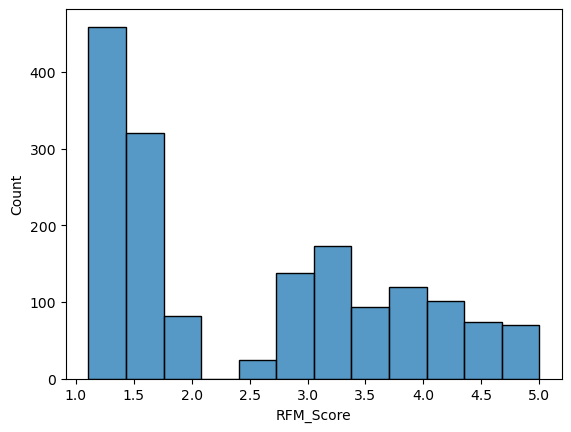

In [74]:
sns.histplot(data=rfm_df,x="RFM_Score")

In [75]:
#######hy=pd.merge(rfm_df,df,on="user_id")
####hy.head()
####hy.sort_values(by="RFM_Score",ascending=False)
rfm_df.sort_values(by="RFM_Score",ascending=False)

,user_id,recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Customer_segment
1164,b88c1107-1d71-4782-bcc9-285877d89b1a,0,44,3777650.0,100.00,99.94,99.94,5.00,Top Customers
430,47e76d57-09d3-4ea4-8531-9b839d83069e,0,61,505900.0,100.00,100.00,100.00,5.00,Top Customers
283,2e31bffe-ea66-44ec-8647-56d0fbab0516,0,27,1605750.0,100.00,99.70,99.70,4.99,Top Customers
908,8f64a145-013a-4d76-85f5-9a0c6aaf3ee2,0,37,53600.0,100.00,99.82,99.82,4.99,Top Customers
261,2b9d276a-54e5-4837-ab8d-cd7ec0e89ea5,0,23,126350.0,100.00,99.49,99.49,4.98,Top Customers
...,...,...,...,...,...,...,...,...,...
1183,baf4f81e-9e74-4645-a432-49beaa6be5d0,89,1,50.0,0.55,26.06,26.06,1.11,Lost Customers
821,8166c6e2-6c2b-46a3-95af-db7a323bce3d,89,1,6000.0,0.55,26.06,26.06,1.11,Lost Customers
1236,c16e3edc-0db2-4bcd-b059-a88cecabcf79,89,1,2100.0,0.55,26.06,26.06,1.11,Lost Customers
1464,e3086307-ab08-48ad-b792-73d13d1f2468,89,1,14000.0,0.55,26.06,26.06,1.11,Lost Customers


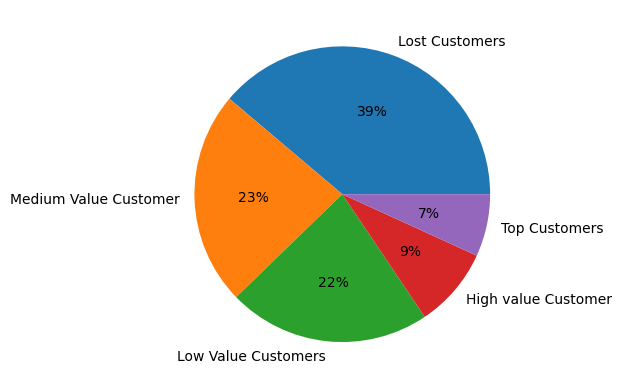

In [76]:
import matplotlib.pyplot as plt
### Maplocation, Ubicacion del Cliente
plt.pie (rfm_df.Customer_segment.value_counts(),
        labels=rfm_df.Customer_segment.value_counts().index,
        autopct='%.0f%%')
plt.show()

## Resultados y Hallazgos para los STAKEHOLDERS

1. Dado el conjunto de datos y usuarios , el 7% se encuentra el top de consumidores de la  app, 9% son usuarios de alto valor  23% consumidores de medio valor mientras que el 61% son usuario de bajo valor lo anterior valorado la frencuencia de depositos que realizan, montos totales y hace cuanto fue su ultima operacion.
2. La Poblacion de valor se encuentra localizada principalmente en, 
CC Plaza de las Américas  - Plaza Mariposa    45.477560%
CC Los Molinos - Zona Montaña Nivel 2         43.590334%
Universidad de los Andes - ML Piso 5          10.932106%